# Categorical Variables
### One-Hot-Encoding (Dummy Variables)

In [1]:
# importing the dataset

import os
import mglearn
import pandas as pd

names = ['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship',
        'race','gender','capital-gain','capital-loss','hours-per-week','native-country','income']
adult_path = os.path.join(mglearn.datasets.DATA_PATH, "adult.data")
data = pd.read_csv(adult_path, header=None, index_col=False, names=names)

# filtering the data to only 7 columns
data = data[['age','workclass','education','gender','hours-per-week','occupation','income']]
display(data.head())

,age,workclass,education,gender,hours-per-week,occupation,income
0,39,State-gov,Bachelors,Male,40,Adm-clerical,<=50K
1,50,Self-emp-not-inc,Bachelors,Male,13,Exec-managerial,<=50K
2,38,Private,HS-grad,Male,40,Handlers-cleaners,<=50K
3,53,Private,11th,Male,40,Handlers-cleaners,<=50K
4,28,Private,Bachelors,Female,40,Prof-specialty,<=50K


In [2]:
# applying one-hot-encoding using get-dummy

data_dummies = pd.get_dummies(data)
data_dummies.head()

,age,hours-per-week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,...,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,income_ <=50K,income_ >50K
0,39,40,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
1,50,13,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,38,40,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,53,40,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,28,40,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [4]:
data_dummies.shape

(32561, 46)

### One-Hot-Encoding (Integer Features)

In [2]:
# creating the dataset

import pandas as pd
demo_df = pd.DataFrame({'Integer Feature': [0,1,2,1], 'Categorical Feature': ['socks','fox','socks','box']})
demo_df

,Integer Feature,Categorical Feature
0,0,socks
1,1,fox
2,2,socks
3,1,box


In [3]:
# applying one-hot encoding based on the column names

demo_df['Integer Feature'] = demo_df['Integer Feature'].astype(str) # converting type to string
pd.get_dummies(demo_df)
# pd.get_dummies(demo_df, columns=['Integer Feature','Categorical Feature'])

,Integer Feature_0,Integer Feature_1,Integer Feature_2,Categorical Feature_box,Categorical Feature_fox,Categorical Feature_socks
0,1,0,0,0,0,1
1,0,1,0,0,1,0
2,0,0,1,0,0,1
3,0,1,0,1,0,0


# Binning and Discretization

In [1]:
# importing the dataset

import mglearn

X, y = mglearn.datasets.make_wave(n_samples=100)

In [2]:
# binning

import numpy as np

bins = np.linspace(-3,3,11)
which_bin = np.digitize(X, bins=bins)

which_bin[:5]

array([[ 4],
       [10],
       [ 8],
       [ 6],
       [ 2]])

In [3]:
# discretization (one-hot-encoding)

from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse=False)
X_binned = encoder.fit_transform(which_bin)

X_binned[:5]

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]])

Text(0.5, 0, 'Input Feature')

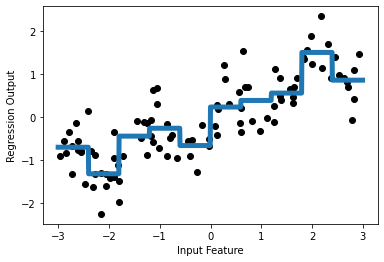

In [14]:
# training linear regression model on the binned dataset

from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

reg = LinearRegression().fit(X_binned, y)

line = np.linspace(-3, 3, 1000, endpoint=False).reshape(-1,1)
line_binned = encoder.transform(np.digitize(line, bins=bins))

plt.plot(X[:,0], y, 'o', c='k')
plt.plot(line, reg.predict(line_binned), linewidth=5)
plt.ylabel('Regression Output')
plt.xlabel('Input Feature')

# Interactions and Polynomials

In [8]:
# importing the dataset

import mglearn

X, y = mglearn.datasets.make_wave(n_samples=100)

In [9]:
# applying PolynimialFeatures

from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=10, include_bias=False)
X_poly = poly.fit_transform(X)

poly.get_feature_names()

['x0', 'x0^2', 'x0^3', 'x0^4', 'x0^5', 'x0^6', 'x0^7', 'x0^8', 'x0^9', 'x0^10']

Text(0.5, 0, 'Input Feature')

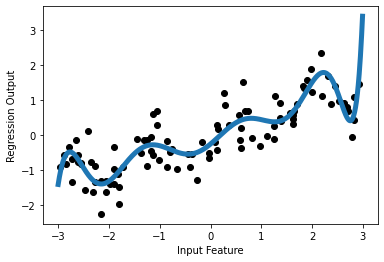

In [13]:
# training linear regression model on the binned dataset

from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

reg = LinearRegression().fit(X_poly, y)

line = np.linspace(-3, 3, 1000, endpoint=False).reshape(-1,1)
line_poly = poly.transform(line)

plt.plot(X[:,0], y, 'o', c='k')
plt.plot(line, reg.predict(line_poly), linewidth=5)
plt.ylabel('Regression Output')
plt.xlabel('Input Feature')

# Automatic Feature Selection
### Univariate Statistics

In [2]:
# importing the dataset and adding noise to it

from sklearn.datasets import load_breast_cancer
import numpy as np

cancer = load_breast_cancer()

noise = np.random.RandomState(42).normal(size=(len(cancer.data), 50))
X_noise = np.hstack([cancer.data, noise])
X_noise.shape

(569, 80)

In [3]:
# splitting the dataset into training and testing datasets

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_noise, cancer.target, random_state=0, test_size=0.5)

In [6]:
# applying univariate statistics (SelectPercentile)

from sklearn.feature_selection import SelectPercentile

select = SelectPercentile(percentile=50)
select.fit(X_train, y_train)
X_train_selected = select.transform(X_train)
X_test_selected = select.transform(X_test)
print('{} {}'.format(X_train.shape, X_train_selected.shape))

(284, 80) (284, 40)


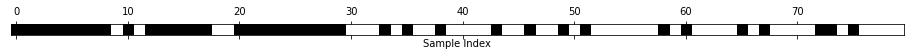

In [9]:
# vizualising the features that were selected

import matplotlib.pyplot as plt

mask = select.get_support()
plt.matshow(mask.reshape(1,-1), cmap='gray_r')
plt.xlabel('Sample Index')
plt.yticks(());

In [20]:
# training the LogisticRegression model

from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(max_iter=5000)
clf.fit(X_train, y_train)
print('Score on all features: {:.3f}'.format(clf.score(X_test, y_test)))
clf.fit(X_train_selected, y_train)
print('Score on selected features: {:.3f}'.format(clf.score(X_test_selected, y_test)))

Score on all features: 0.951
Score on selected features: 0.933


### Model-Based Feature Selection

In [1]:
# importing the dataset, adding noise to it and splitting it

from sklearn.datasets import load_breast_cancer
import numpy as np

cancer = load_breast_cancer()

noise = np.random.RandomState(42).normal(size=(len(cancer.data), 50))
X_noise = np.hstack([cancer.data, noise])

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_noise, cancer.target, random_state=0, test_size=0.5)

In [2]:
# feature selection

from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

select = SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=42), threshold='median')
select.fit(X_train, y_train)
X_train_l1 = select.transform(X_train)
X_test_l1 = select.transform(X_test)

print(X_train.shape)
print(X_train_l1.shape)

(284, 80)
(284, 40)


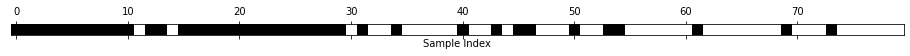

In [3]:
# vizualising the features that were selected

import matplotlib.pyplot as plt

mask = select.get_support()
plt.matshow(mask.reshape(1,-1), cmap='gray_r')
plt.xlabel('Sample Index')
plt.yticks(());

In [4]:
# training the RandomForestClassifier model

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)
print('Score on all features: {:.3f}'.format(clf.score(X_test, y_test)))
clf.fit(X_train_l1, y_train)
print('Score on selected features: {:.3f}'.format(clf.score(X_test_l1, y_test)))

Score on all features: 0.944
Score on selected features: 0.944
